# Learning a function from a dataset

## Problem setup

We will learn a function from a dataset. The dataset used to train the model can be found [here](https://github.com/chaobrain/pinnx/blob/master/docs/dataset/dataset.train), and the dataset used to test the model can be found [here](https://github.com/chaobrain/pinnx/blob/master/docs/dataset/dataset.test).

## Implementation
A step by step description of how to implement this code is written below.

Import the necessary library used for this project as described below.

In [1]:
import brainstate as bst
import numpy as np

from deepxde import pinnx

The next step is to import the dataset needed for the model training.

In [6]:
train_data = np.loadtxt("../dataset/dataset.train")
test_data = np.loadtxt("../dataset/dataset.test")

The variables `train_data` and `test_data` are used to import the dataset.

After loading the dataset, the specifics of the model are defined. The first line defines the layout of the network size used to train the model. The next line specifies the activation function used tanh and the initializer as Kaiming uniform.

In [12]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = bst.init.KaimingUniform()

net = pinnx.nn.Model(
    pinnx.nn.DictToArray(x=None),
    pinnx.nn.FNN(layer_size, activation, bst.init.KaimingUniform()),
    pinnx.nn.ArrayToDict(y=None),
)

When we get the model, we can create a dataset of pinnx with the model as approximator parameter.

In [13]:
data = pinnx.problem.DataSet(
    X_train={'x': train_data[:, 0]},
    y_train={'y': train_data[:, 1]},
    X_test={'x': test_data[:, 0]},
    y_test={'y': test_data[:, 1]},
    standardize=True,
    approximator=net,
)

The model can now be built using adam as an optimizer with a learning rate of 0.001. The model is trained with 50000 iterations:

In [14]:
model = pinnx.Trainer(data)
model.compile(bst.optim.Adam(0.001), metrics=["l2 relative error"]).train(iterations=50000)

Compiling trainer...
'compile' took 0.045116 s

Training trainer...

Step      Train loss                                       Test loss                                        Test metric                                        
0         {'y': Array(0.43163803, dtype=float32)}          {'y': Array(0.44073665, dtype=float32)}          [{'y': Array(0.92973304, dtype=float32)}]          
1000      {'y': Array(0.00634743, dtype=float32)}          {'y': Array(0.00659523, dtype=float32)}          [{'y': Array(0.11373229, dtype=float32)}]          
2000      {'y': Array(0.00557385, dtype=float32)}          {'y': Array(0.005949, dtype=float32)}            [{'y': Array(0.10801665, dtype=float32)}]          
3000      {'y': Array(0.00520436, dtype=float32)}          {'y': Array(0.00564126, dtype=float32)}          [{'y': Array(0.10518572, dtype=float32)}]          
4000      {'y': Array(0.00494527, dtype=float32)}          {'y': Array(0.00545862, dtype=float32)}          [{'y': Array(0.10346896

The best trained model is saved and plotted.

Saving loss history to c:\Github\pinnx\docs\examples-function\loss.dat ...
Saving checkpoint into c:\Github\pinnx\docs\examples-function\loss.dat
Saving training data to c:\Github\pinnx\docs\examples-function\train.dat ...
Saving checkpoint into c:\Github\pinnx\docs\examples-function\train.dat
Saving test data to c:\Github\pinnx\docs\examples-function\test.dat ...
Saving checkpoint into c:\Github\pinnx\docs\examples-function\test.dat


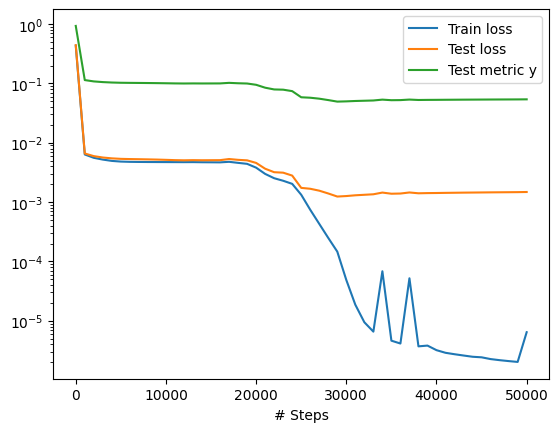

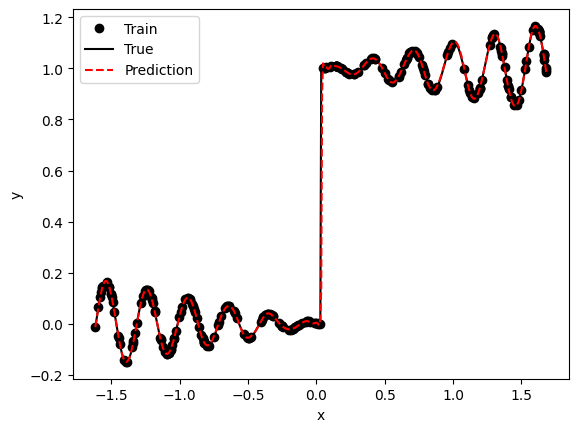

In [15]:
model.saveplot(issave=True, isplot=True)